In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from Functions import *

In [4]:
pos = pd.read_csv('D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_POS_CASH_balance.csv')

In [5]:
pos.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR
0,1803195,-31,48.0,45.0,Active,0,0,185279
1,1803195,-17,48.0,31.0,Active,0,0,185279
2,1803195,-21,48.0,35.0,Active,0,0,185279
3,1803195,-8,48.0,21.0,Active,0,0,185279
4,1803195,-4,48.0,17.0,Active,0,0,185279


# Pre check overall Dataframe

In [6]:
pos_check = pre_check_tool(pos)
pos_check.split_data()

In [7]:
# Check null percent
pos_check.check_per_null()

,number_missing,percent_missing
SK_ID_PREV,0,0.000000
MONTHS_BALANCE,0,0.000000
CNT_INSTALMENT,21863,0.255906
CNT_INSTALMENT_FUTURE,21878,0.256081
NAME_CONTRACT_STATUS,0,0.000000
SK_DPD,0,0.000000
SK_DPD_DEF,0,0.000000
SK_ID_CURR,0,0.000000


In [8]:
# find cols that have null > 90%
print(pos_check.find_null_cols(0.9))

Index([], dtype='object')


NO COLUMNS HAVE NULL VALUES > 90% -> SO WE'RE KEEPING THE DATASET AS IT IS FOR NOW

In [9]:
#duplicate check
pos.duplicated().sum()

0

In [10]:
# valid value
## Num data
pos_check.check_value_num()
print('\n\n\n')

## cat data
pos_check.check_value_cat()

SK_ID_PREV  has     >0 8543375,  =0 0  ,   <0 0,    nan: 0,   other values: 0
MONTHS_BALANCE  has     >0 0,  =0 0  ,   <0 8543375,    nan: 0,   other values: 0
CNT_INSTALMENT  has     >0 8521512,  =0 0  ,   <0 0,    nan: 21863,   other values: 0
CNT_INSTALMENT_FUTURE  has     >0 7499563,  =0 1021934  ,   <0 0,    nan: 21878,   other values: 0
SK_DPD  has     >0 259107,  =0 8284268  ,   <0 0,    nan: 0,   other values: 0
SK_DPD_DEF  has     >0 99110,  =0 8444265  ,   <0 0,    nan: 0,   other values: 0
SK_ID_CURR  has     >0 8543360,  =0 15  ,   <0 0,    nan: 0,   other values: 0






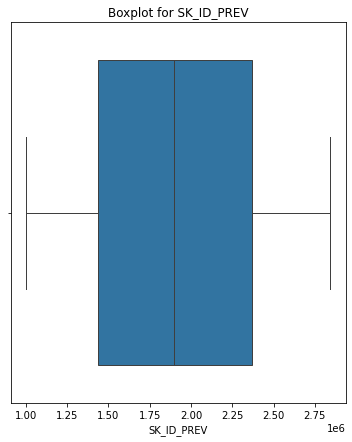

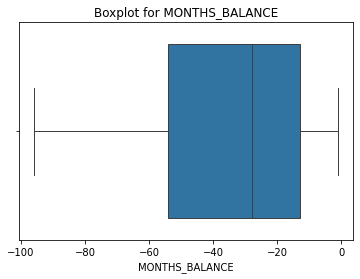

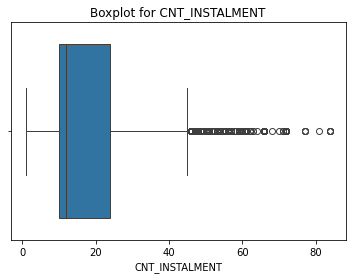

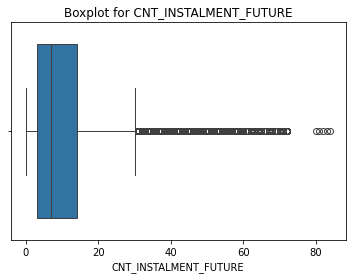

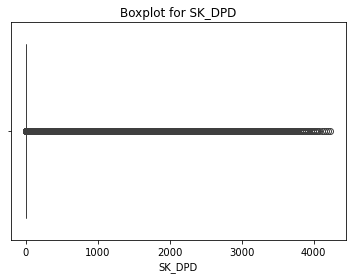

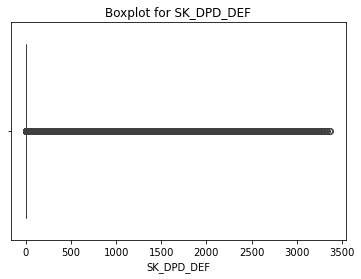

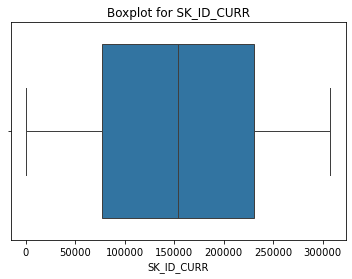

In [11]:
# Outliers 
pos_check.show_outliers()

In [12]:
pos_check.dist_catchart()

'Categorical DF is not available'

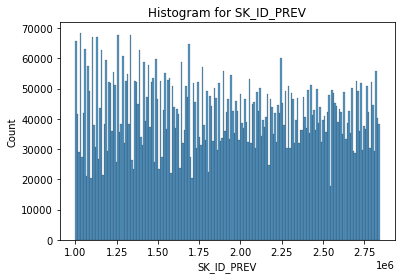

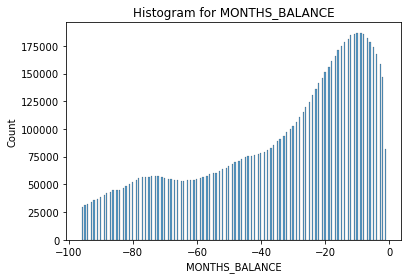

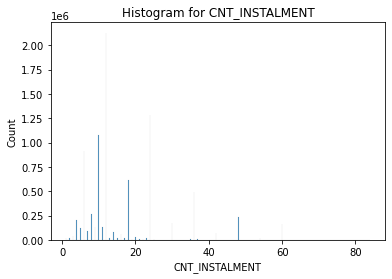

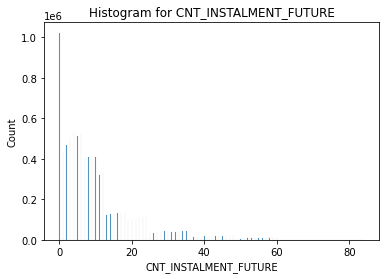

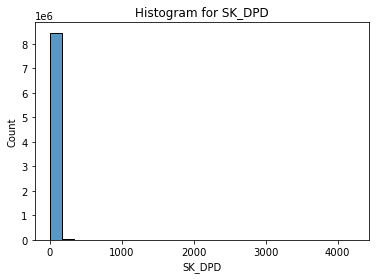

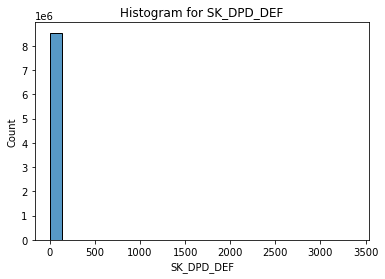

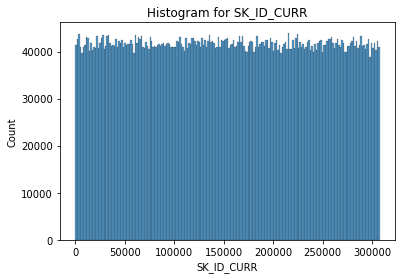

In [13]:
pos_check.dist_numchart()

# Data Exploration

# EDA Internal

In [14]:
# tao cot de kiem tra so lan bi qua han khi thanh toan khoan vay
def check_over_due(x):
    if x['SK_DPD'] > 0 and x['SK_DPD_DEF'] > 0:
        return 1
    else:
        return 0

pos['over_due'] =  pos.apply(check_over_due,axis= 1)

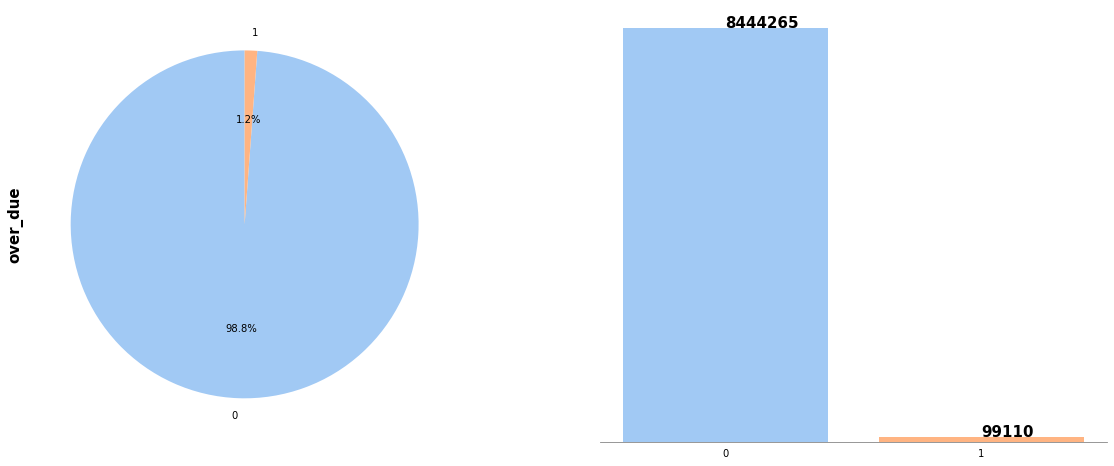

In [15]:
obj1 = Univariate_Analysis(df= pos, col= 'over_due', num= False)
obj1.visualize()

+ There are so many monthly payments that are paid in late with 98.8% 

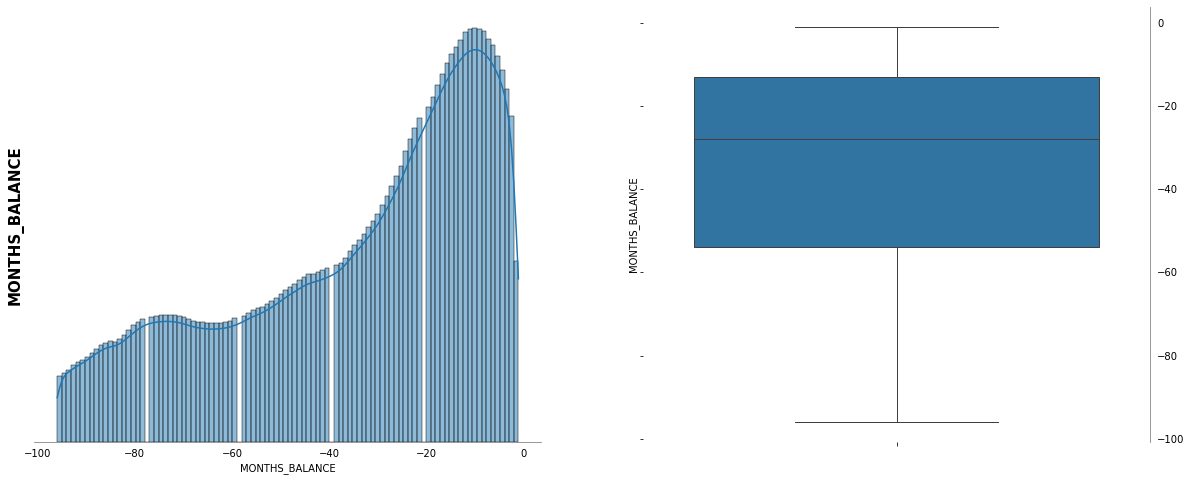

In [16]:
obj2 = Univariate_Analysis(df= pos , col= 'MONTHS_BALANCE', num= True)
obj2.visualize()

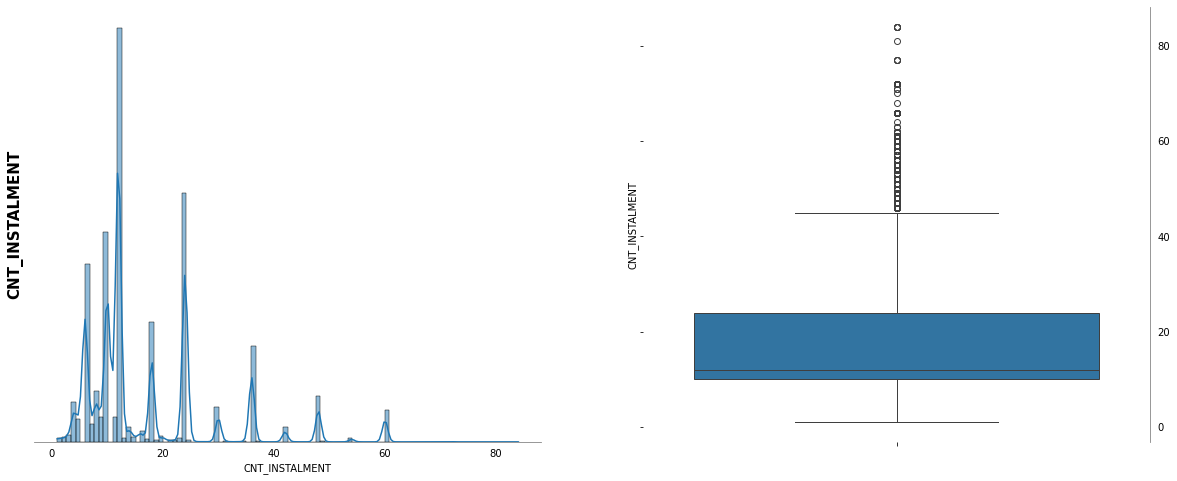

In [17]:
obj3 = Univariate_Analysis(df= pos , col= 'CNT_INSTALMENT', num= True)
obj3.visualize()

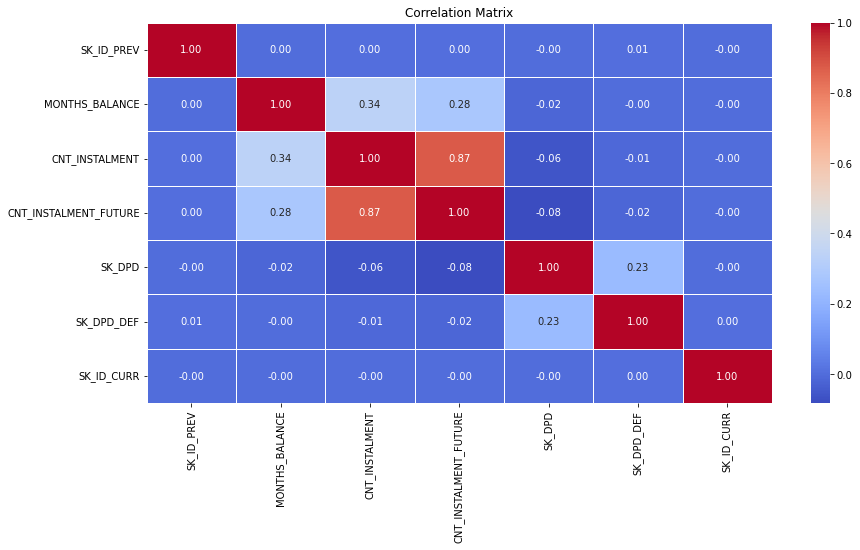

In [18]:
num = pos_check.numdf
# Correlation
draw_corr(num)

### Features that have high correlation: 
* CNT_INSTALMENT - CNT_INSTALMENT_FUTURE

# EDA External

In [32]:
file_train = 'D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv'
app_train = pd.read_csv(file_train)
app_train = app_train[['SK_ID_CURR','TARGET']]

In [33]:
merge_table = pd.merge(pos,app_train,on='SK_ID_CURR',how='left')
merge_table.head()

,SK_ID_PREV,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF,SK_ID_CURR,over_due,TARGET
0,1803195,-31,48.0,45.0,Active,0,0,185279,0,0.0
1,1803195,-17,48.0,31.0,Active,0,0,185279,0,0.0
2,1803195,-21,48.0,35.0,Active,0,0,185279,0,0.0
3,1803195,-8,48.0,21.0,Active,0,0,185279,0,0.0
4,1803195,-4,48.0,17.0,Active,0,0,185279,0,0.0


* Đây chính là thông tin cập nhật hàng tháng của các khoản vay POS, CASH theo từng tháng cho nên ta lấy thông tin cập nhật mới nhất theo từng tháng của từng SK_ID_PREV

In [34]:
pos_filter = merge_table.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"]).last().reset_index()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


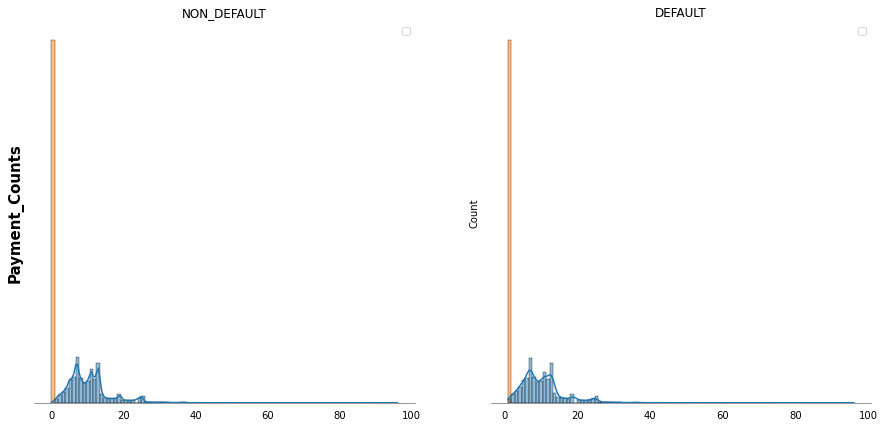

In [35]:
# so lan phải trả để cac khoan CASH, POS duoc thanh toan hoan tat
pos_filter['Payment_Counts'] = pos.sort_values(by=['MONTHS_BALANCE']).groupby(["SK_ID_CURR", "SK_ID_PREV"])['MONTHS_BALANCE']\
    .agg('count').reset_index()['MONTHS_BALANCE']

obj1 = Bivariate_Analysis(df = pos_filter, col1= 'Payment_Counts', num= True)
obj1.plothistogram()

* Almost the total payment in each loan is between 10 to 30 , but there are some extreme point with nearly 100 times payment.

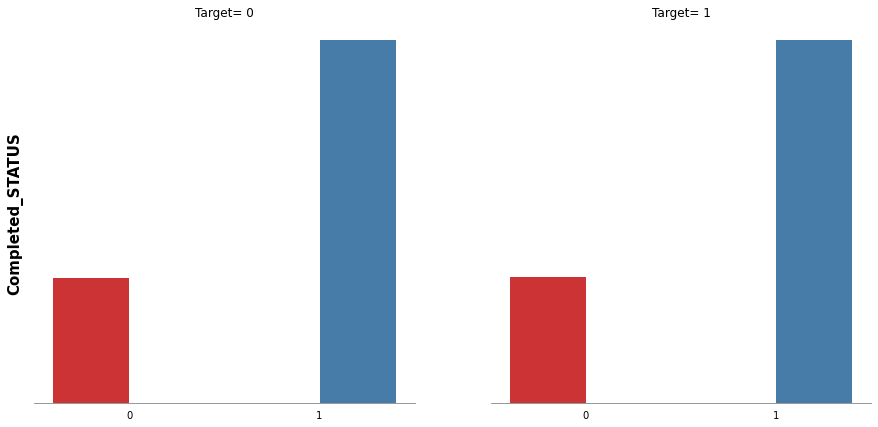

In [36]:
#kiem tra xem khoan vay do da duoc tra hoan tat hay chua (0 la chua, 1 la co)
pos_filter["Completed_STATUS"] = pos_filter["NAME_CONTRACT_STATUS"].apply(lambda x: 1 if x== "Completed" else 0)
pos_filter = pos_filter.drop(columns='NAME_CONTRACT_STATUS',axis = 1)
obj1 = Bivariate_Analysis(df = pos_filter, col1= 'Completed_STATUS', num= False)
obj1.countplot()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


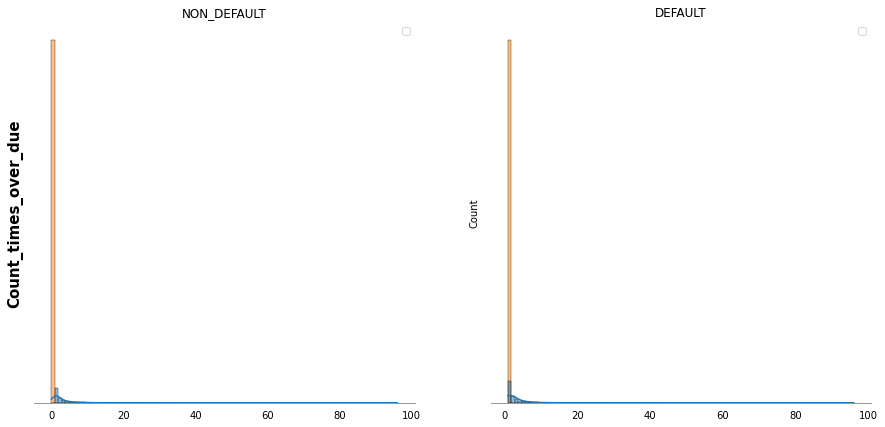

In [37]:
# dem xem trong 1 khoan vay ho nop tien muon bao nhieu lan

sk_dpd_count_overdue = pos[pos['SK_DPD'] > 0].sort_values(by=['MONTHS_BALANCE'])\
    .groupby(["SK_ID_CURR", "SK_ID_PREV"])['SK_DPD'].agg('count').reset_index()\
        .rename(columns={'SK_DPD':'Count_times_over_due'})

pos_filter = pd.merge(pos_filter, sk_dpd_count_overdue , on=['SK_ID_CURR', 'SK_ID_PREV'], how='left')

obj1 = Bivariate_Analysis(df = pos_filter, col1= 'Count_times_over_due', num= True)
obj1.plothistogram()


* Hầu hết các khao